In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
# Read the CSV file
df = pd.read_csv('inat_insects.csv')


In [3]:
# Convert 'observed_on' to datetime
df['observed_on'] = pd.to_datetime(df['observed_on'])


In [4]:
# Extract year and month from the 'observed_on' column
df['year'] = df['observed_on'].dt.year
df['month'] = df['observed_on'].dt.month

In [5]:
# Species Richness
species_count = df['scientific_name'].nunique()
print(f"Total number of unique species: {species_count}")

Total number of unique species: 365


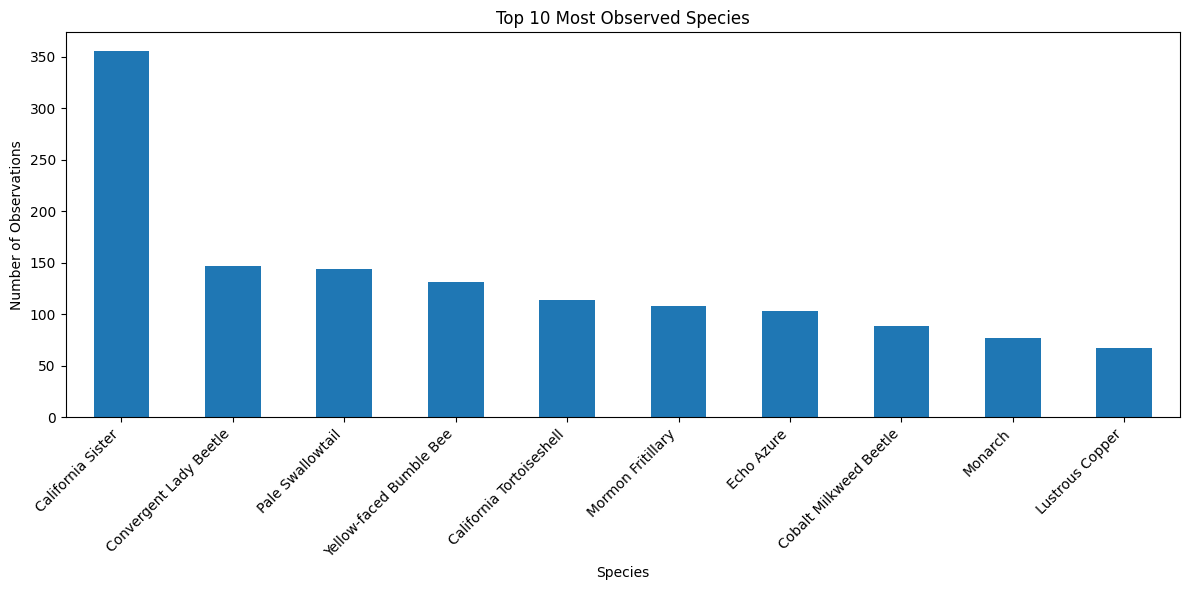

In [6]:
# Most Common Species
top_species = df['common_name'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_species.plot(kind='bar')
plt.title('Top 10 Most Observed Species')
plt.xlabel('Species')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

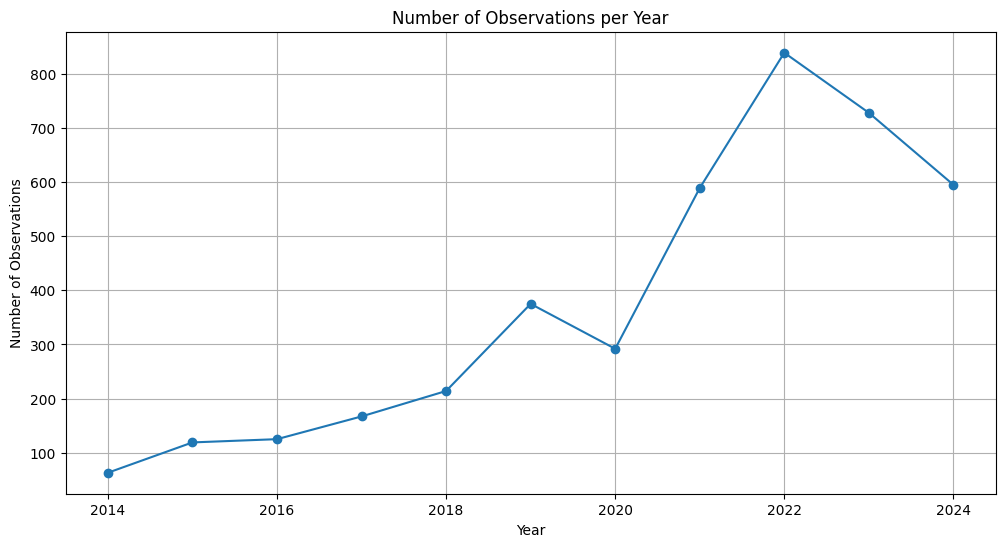

In [7]:
# Observations Over Time
yearly_observations = df['year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
yearly_observations.plot(kind='line', marker='o')
plt.title('Number of Observations per Year')
plt.xlabel('Year')
plt.ylabel('Number of Observations')
plt.grid(True)
plt.show()

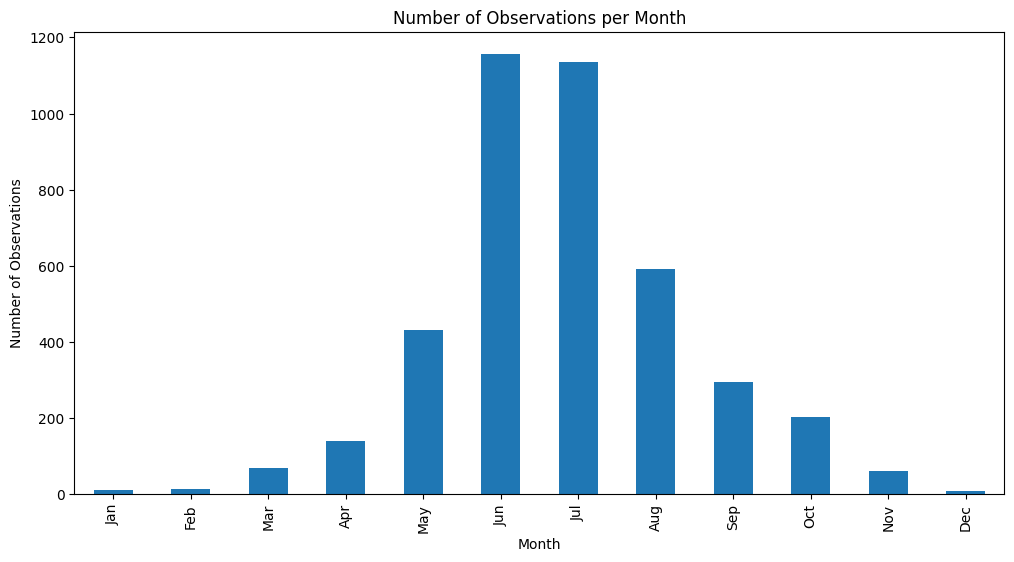

In [8]:
# Seasonal Patterns
monthly_observations = df['month'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
monthly_observations.plot(kind='bar')
plt.title('Number of Observations per Month')
plt.xlabel('Month')
plt.ylabel('Number of Observations')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

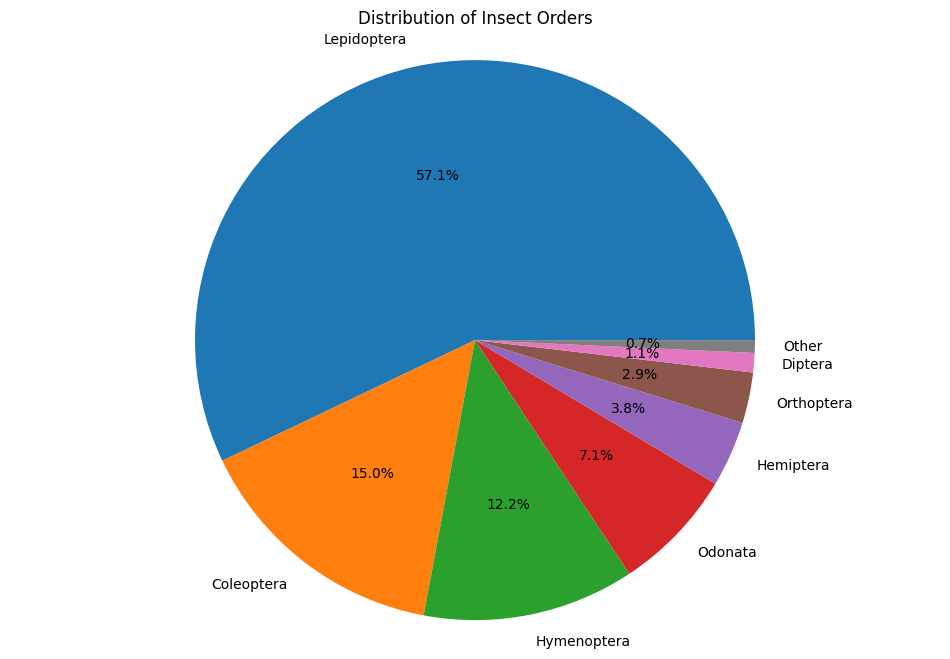

Composition of 'Other' category:
Megaloptera: 11 observations (0.27%)
Neuroptera: 8 observations (0.19%)
Blattodea: 7 observations (0.17%)
Mantodea: 2 observations (0.05%)
Plecoptera: 2 observations (0.05%)


In [14]:
# Order Distribution
order_distribution = df['taxon_order_name'].value_counts()

# Calculate the threshold for 1.1%
threshold = 0.011 * len(df)

# Group orders with less than 1.1% of observations into 'Other'
other_count = order_distribution[order_distribution < threshold].sum()
order_distribution_grouped = order_distribution[order_distribution >= threshold]
order_distribution_grouped['Other'] = other_count

plt.figure(figsize=(12, 8))
plt.pie(order_distribution_grouped, labels=order_distribution_grouped.index, autopct='%1.1f%%')
plt.title('Distribution of Insect Orders')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

# Print the composition of 'Other' category
print("Composition of 'Other' category:")
for order, count in order_distribution[order_distribution < threshold].items():
    percentage = (count / len(df)) * 100
    print(f"{order}: {count} observations ({percentage:.2f}%)")

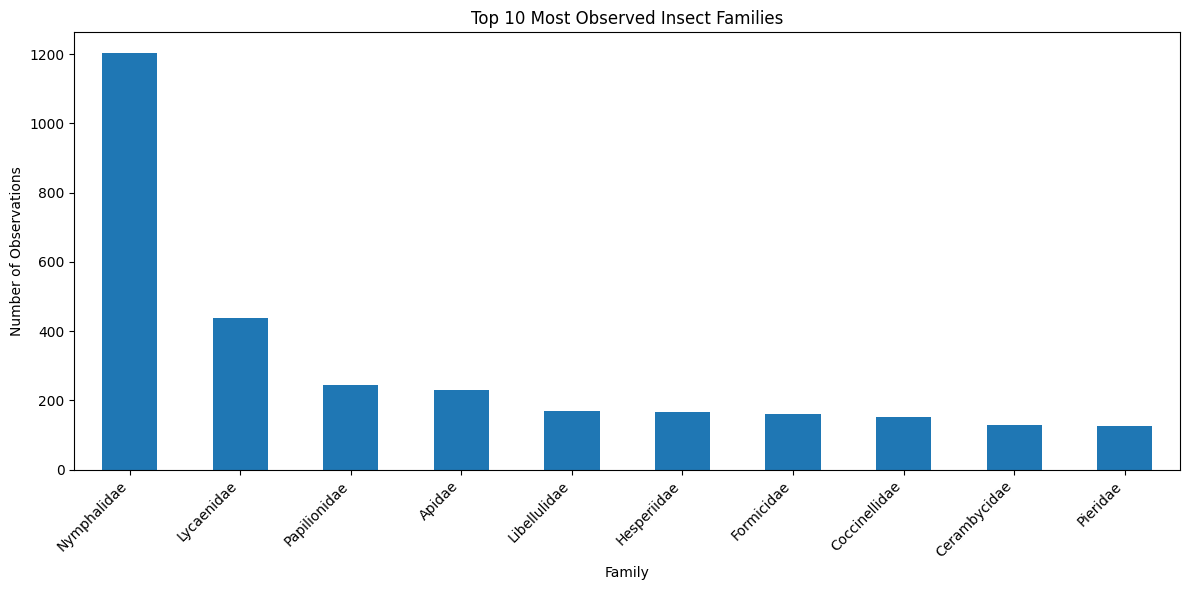

In [10]:
# Family Distribution
family_distribution = df['taxon_family_name'].value_counts().head(10)
plt.figure(figsize=(12, 6))
family_distribution.plot(kind='bar')
plt.title('Top 10 Most Observed Insect Families')
plt.xlabel('Family')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

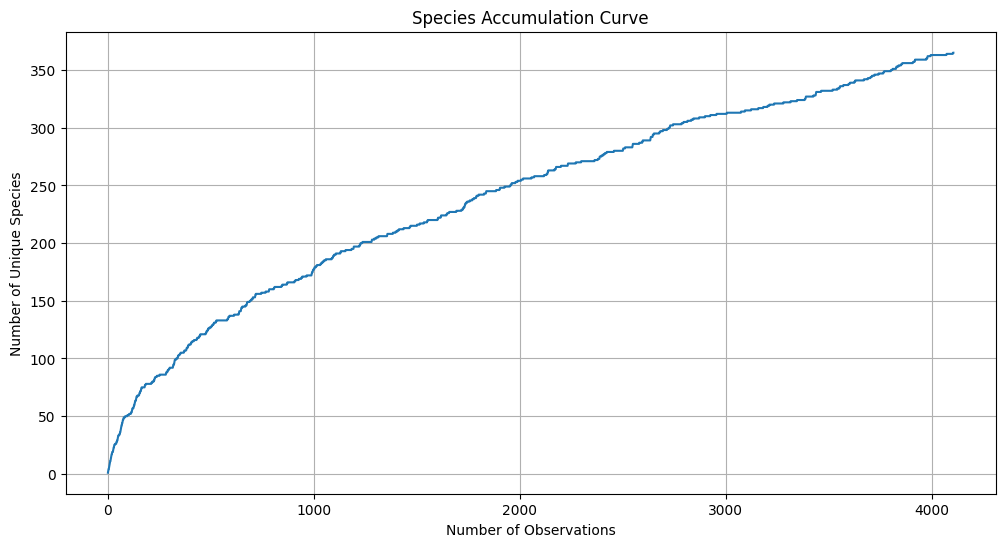

In [11]:
# Species Accumulation Curve
df_sorted = df.sort_values('observed_on')
unique_species = set()
species_accumulation = []

for _, row in df_sorted.iterrows():
    unique_species.add(row['scientific_name'])
    species_accumulation.append(len(unique_species))

plt.figure(figsize=(12, 6))
plt.plot(range(1, len(species_accumulation) + 1), species_accumulation)
plt.title('Species Accumulation Curve')
plt.xlabel('Number of Observations')
plt.ylabel('Number of Unique Species')
plt.grid(True)
plt.show()